Felipe Piovan - RA00319594
Gabriel Bento - RA00320082
Paulo Cesar - RA00274417
Edgard Ramos - RA00320141


In [1]:
import pandas as pd

data = pd.read_csv('steam.csv')


data.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,124534.0,3339.0,17612.0,317.0,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,3318.0,633.0,277.0,62.0,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0.0,3416.0,398.0,187.0,34.0,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,1273.0,267.0,258.0,184.0,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0.0,5250.0,288.0,624.0,415.0,5000000-10000000,3.99


In [ ]:
import pandas as pd


columns_to_drop = ['appid', 'release_date', 'english', 'developer', 'publisher',
                   'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
                   'achievements', 'average_playtime', 'median_playtime', 'owners', 'name']
data = data.drop(columns=columns_to_drop)



print(data.head())




   positive_ratings  negative_ratings  price
0            124534              3339   7.19
1              3318               633   3.99
2              3416               398   3.99
3              1273               267   3.99
4              5250               288   3.99


In [ ]:
data.head()

,positive_ratings,negative_ratings,price
0,124534,3339,7.19
1,3318,633,3.99
2,3416,398,3.99
3,1273,267,3.99
4,5250,288,3.99


In [ ]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados usando o método Z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

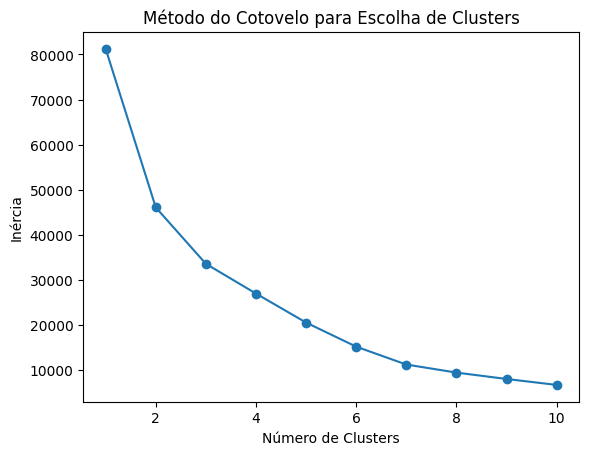

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escolhendo o número de clusters usando o método Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de Clusters')
plt.show()


In [ ]:
# Segmentação com K-Means (k=3)
kmeans = KMeans(n_clusters=5, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


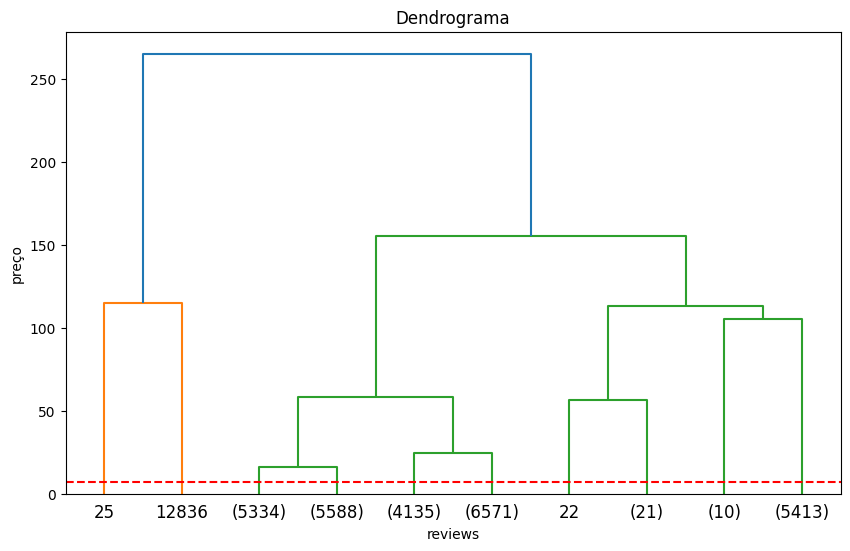

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage  # Importar a função linkage



# Calcular a matriz de linkage
linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrograma')
plt.xlabel('reviews')
plt.ylabel('preço')
plt.axhline(y=7, color='r', linestyle='--')
plt.show()


In [ ]:
# Escolhendo o número de clusters com base no dendrograma
num_clusters_hierarchical = 5 # Escolha o número de clusters com base na análise do dendrograma

# Realizando a segmentação hierárquica
hierarchical_clusters = fcluster(linkage_matrix, t=num_clusters_hierarchical, criterion='maxclust')

# Adicionando os clusters à coluna do DataFrame
data['hierarchical_cluster'] = hierarchical_clusters


In [ ]:
from sklearn.metrics import silhouette_score

# Avaliação do K-Means
kmeans_silhouette = silhouette_score(data_scaled, data['kmeans_cluster'])
print(f"Silhueta do K-Means: {kmeans_silhouette}")

# Avaliação do Método Hierárquico
hierarchical_silhouette = silhouette_score(data_scaled, data['hierarchical_cluster'])
print(f"Silhueta do Método Hierárquico: {hierarchical_silhouette}")


Silhueta do K-Means: 0.7122511150598579
Silhueta do Método Hierárquico: 0.6664345092489762


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

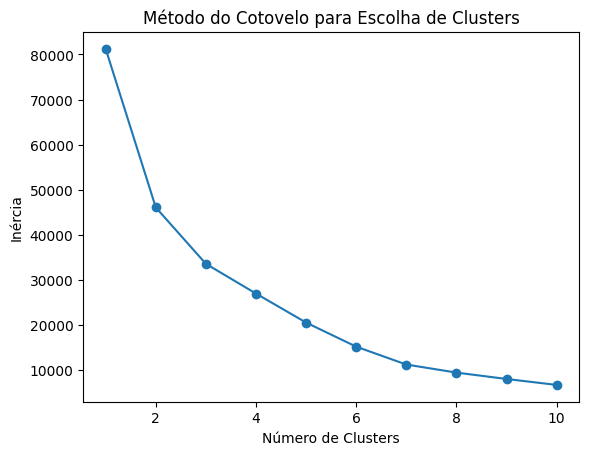

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escolhendo o número de clusters usando o método Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de Clusters')
plt.show()


In [ ]:
data.head()

,positive_ratings,negative_ratings,price,kmeans_cluster,hierarchical_cluster
0,124534,3339,7.19,0,5
1,3318,633,3.99,0,3
2,3416,398,3.99,0,3
3,1273,267,3.99,0,3
4,5250,288,3.99,0,3


In [ ]:
# Carregando os dados do arquivo XLS
data = pd.read_csv('steam.csv')


# Selecionando as colunas relevantes para a análise
selected_columns = ['positive_ratings', 'negative_ratings', 'price']
# Método DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Aplicando o DBSCAN aos dados selecionados
clusters_dbscan = dbscan.fit_predict(data[selected_columns])

# Adicionando a coluna de clusters DBSCAN aos dados originais
data['Cluster_DBSCAN'] = clusters_dbscan

print("\nResultados do Método DBSCAN:")
print(data.groupby('Cluster_DBSCAN').mean())







Resultados do Método DBSCAN:
                        appid   english  required_age  achievements  \
Cluster_DBSCAN                                                        
-1              529163.042437  0.981256      0.457010     56.926078   
 0              509975.714286  1.000000      0.000000      7.285714   
 1              598524.000000  1.000000      0.000000      6.400000   
 2              484735.000000  1.000000      0.000000     17.666667   
 3              636041.666667  1.000000      0.000000     15.166667   
...                       ...       ...           ...           ...   
 596            932248.000000  1.000000      0.000000      6.400000   
 597            948044.666667  0.800000      1.066667      2.400000   
 598            907486.000000  1.000000      0.000000     12.600000   
 599            908193.750000  1.000000      0.000000     17.250000   
 600            974543.750000  1.000000      0.000000     28.750000   

                positive_ratings  negative_rat

<ipython-input-54-5d0ea39f61a6>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('Cluster_DBSCAN').mean())
